In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os


In [20]:
df = pd.read_csv('data_test.csv',encoding='windows-1251')
df

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before
...,...,...,...,...,...,...,...
19995,108834,посох,булава,лук,посох,26.37,after
19996,119941,посох,меч,лук,посох,23.73,after
19997,112911,топор,посох,булава,топор,27.73,after
19998,111684,меч,топор,посох,меч,24.20,after


In [22]:
df['combined']=df.apply(lambda x:'%s,%s,%s,%s' % (x['unit_1'],x['unit_2'],x['unit_3'],x['unit_4']),axis=1)
df['combined']=df['combined'].apply(lambda x:x.split(','))
df['combined']=df['combined'].apply(lambda x:sorted(x))
df

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,combined
0,103921,топор,лук,булава,лук,17.35,before,"[булава, лук, лук, топор]"
1,117214,посох,посох,лук,лук,21.84,before,"[лук, лук, посох, посох]"
2,115502,меч,посох,булава,топор,16.00,before,"[булава, меч, посох, топор]"
3,110102,булава,лук,лук,булава,17.22,before,"[булава, булава, лук, лук]"
4,104989,меч,посох,булава,посох,19.20,before,"[булава, меч, посох, посох]"
...,...,...,...,...,...,...,...,...
19995,108834,посох,булава,лук,посох,26.37,after,"[булава, лук, посох, посох]"
19996,119941,посох,меч,лук,посох,23.73,after,"[лук, меч, посох, посох]"
19997,112911,топор,посох,булава,топор,27.73,after,"[булава, посох, топор, топор]"
19998,111684,меч,топор,посох,меч,24.20,after,"[меч, меч, посох, топор]"


In [23]:
#все различные комбинации оружий
import itertools as itr 
vals=pd.DataFrame([['топор','лук','булава','посох']])
ndf = vals.apply(lambda x: list(itr.combinations_with_replacement(x,4)), axis = 1)

A = []
B = ndf.values.tolist()

for i in B:
  A.extend(i)
ndf=sum(ndf, [])
for i in range(35):
    ndf[i]=list(ndf[i])
    ndf[i]=sorted(ndf[i])
ndf


[['топор', 'топор', 'топор', 'топор'],
 ['лук', 'топор', 'топор', 'топор'],
 ['булава', 'топор', 'топор', 'топор'],
 ['посох', 'топор', 'топор', 'топор'],
 ['лук', 'лук', 'топор', 'топор'],
 ['булава', 'лук', 'топор', 'топор'],
 ['лук', 'посох', 'топор', 'топор'],
 ['булава', 'булава', 'топор', 'топор'],
 ['булава', 'посох', 'топор', 'топор'],
 ['посох', 'посох', 'топор', 'топор'],
 ['лук', 'лук', 'лук', 'топор'],
 ['булава', 'лук', 'лук', 'топор'],
 ['лук', 'лук', 'посох', 'топор'],
 ['булава', 'булава', 'лук', 'топор'],
 ['булава', 'лук', 'посох', 'топор'],
 ['лук', 'посох', 'посох', 'топор'],
 ['булава', 'булава', 'булава', 'топор'],
 ['булава', 'булава', 'посох', 'топор'],
 ['булава', 'посох', 'посох', 'топор'],
 ['посох', 'посох', 'посох', 'топор'],
 ['лук', 'лук', 'лук', 'лук'],
 ['булава', 'лук', 'лук', 'лук'],
 ['лук', 'лук', 'лук', 'посох'],
 ['булава', 'булава', 'лук', 'лук'],
 ['булава', 'лук', 'лук', 'посох'],
 ['лук', 'лук', 'посох', 'посох'],
 ['булава', 'булава', 'булава

In [33]:
import statistics as st
from decimal import Decimal

In [34]:
data = {'combination':[],'avg before': [],'avg after':[],'med before':[],'med after':[]}
inf = pd.DataFrame(data)
for comb in ndf:
    sumbef=0.0
    countbef=0
    sumaft=0.0
    countaft=0
    listbef=[]
    listaft=[]
    for i in range(20000):
        if comb==df['combined'][i]:
            if df['balance_mark'][i]=='before':
                sumbef=sumbef+df['len'][i]
                countbef=countbef+1
                listbef.append(df['len'][i])
            else:
                sumaft=sumaft+df['len'][i]
                countaft=countaft+1
                listaft.append(df['len'][i])
    new_row={'combination':comb,'avg before': sumbef/countbef,'avg after':sumaft/countaft,'med before':st.median(map(Decimal,listbef)),'med after':st.median(map(Decimal,listaft))}
    inf=inf.append(new_row,ignore_index=True)
    listbef=[]
    listaft=[]
inf

,combination,avg before,avg after,med before,med after
0,"[топор, топор, топор, топор]",18.891667,19.969167,18.66999999999999992894572642,20.25000000000000000000000000
1,"[лук, топор, топор, топор]",19.963235,24.986615,20.36500000000000021316282073,25.1600000000000001421085471520200371742248535...
2,"[булава, топор, топор, топор]",20.389500,20.086825,20.12500000000000000000000000,20.3000000000000007105427357601001858711242675...
3,"[посох, топор, топор, топор]",20.026418,24.732090,20.030000000000001136868377216160297393798828125,24.75
4,"[лук, лук, топор, топор]",19.750435,24.711685,19.58999999999999985789145285,24.7300000000000004263256414560601115226745605...
5,"[булава, лук, топор, топор]",19.685803,24.862489,19.5100000000000015631940186722204089164733886...,25.0399999999999991473487170878797769546508789...
6,"[лук, посох, топор, топор]",20.104787,25.163665,19.8900000000000005684341886080801486968994140625,25.4299999999999997157829056959599256515502929...
7,"[булава, булава, топор, топор]",20.053226,20.224490,20.3399999999999998578914528479799628257751464...,20.06499999999999950262008497
8,"[булава, посох, топор, топор]",20.232557,25.265568,20.42499999999999893418589636,25.67999999999999971578290570
9,"[посох, посох, топор, топор]",20.230200,24.991188,20.50999999999999978683717927,25.1700000000000017053025658242404460906982421875


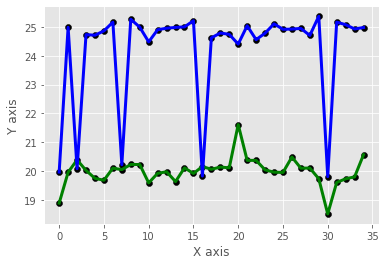

In [28]:
for k in range(36):
        x = [j for j in range(k)]   
x2=x   
y=inf['avg before']
y2=inf['avg after']

plt.plot(x, y, 'g', label='before', linewidth=3) 
plt.scatter(x, y, color='k') 

plt.plot(x2, y2, 'b', label='after', linewidth=3)
plt.scatter(x2, y2, color='k')

plt.title('')     
plt.ylabel('Y axis')   
plt.xlabel('X axis')   
 
plt.show() 

из графика и таблицы видно, что изменение настройки баланса повлияло на среднюю продолжительность боя по больштнству комбинций оружия - она увеличилась

на случай, если везде как-то оказались серьезные выбросы, посмотрим еще на изменение медиан

<AxesSubplot:>

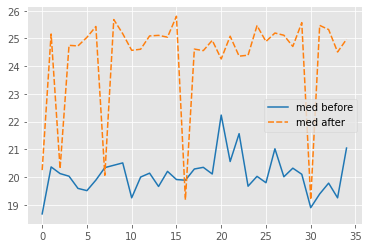

In [38]:
import seaborn as sns
sns.lineplot(data=inf.drop(['avg before','avg after'],axis=1),palette='tab10')

тут примерно такая же история: почти везде медианы оказались больше, чем раньше. значит, наша гипотеза об увеличении времени боя подтверждается